## Loading Metek MRR2 data

In [4]:
import gzip

import cmweather  # noqa
import matplotlib.pyplot as plt
from open_radar_data import DATASETS

import xradar as xd

`xd.io.open_metek_datatree` supports the Metek MRR2 processed (.pro, .ave) and raw (.raw) files. The initalized datatree will contain all of the vertically pointing radar data in one sweep. 

In this example, we are loading the 60 s average files from the MRR2 sampling a rain event over the Argonne Testbed for Multiscale Observational Science at Argonne National Laboratory in the Chicago suburbs.

In [5]:
mrr_test_file = DATASETS.fetch("0308.pro.gz")
with gzip.open(mrr_test_file, "rt") as test_file:
    ds = xd.io.open_metek_datatree(test_file)

View the structure of the loaded datatree. 

In [6]:
ds["sweep_0"]

DataTree('sweep_0', parent="root")
    Dimensions:                       (sample: 64, time: 362, range: 31,
                                       index: 11222)
    Coordinates:
        velocity_bins                 (sample) float64 512B ...
      * range                         (range) float64 248B 150.0 300.0 ... 4.65e+03
      * time                          (time) datetime64[ns] 3kB 2024-03-08T23:00:...
    Dimensions without coordinates: sample, index
    Data variables: (12/17)
        transfer_function             (time, range) float64 90kB ...
        spectral_reflectivity         (index, sample) float64 6MB ...
        drop_size                     (index, sample) float64 6MB ...
        drop_number_density           (index, sample) float64 6MB ...
        percentage_valid_spectra      (time) float64 3kB ...
        path_integrated_attenuation   (time, range) float64 90kB ...
        ...                            ...
        altitude                      float64 8B ...
        longitude                     float64 8B ...
        latitude                      float64 8B ...
        spectrum_index                (time, range) float64 90kB ...
        azimuth                       (time) float64 3kB ...
        elevation                     (time) float64 3kB ...

## Plot MRR timeseries

One can use the typical xarray plotting functions for plotting the velocity or other MRR2 variables.

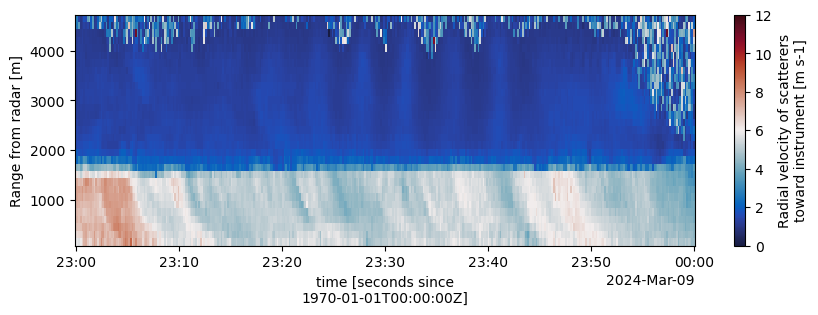

In [7]:
plt.figure(figsize=(10, 3))
ds["sweep_0"]["velocity"].T.plot(cmap="balance", vmin=0, vmax=12)

## Plot MRR spectra

In order to plot the spectra, you first need to locate the index that corresponds to the given time period. This is done using xarray .sel() functionality to get the indicies.

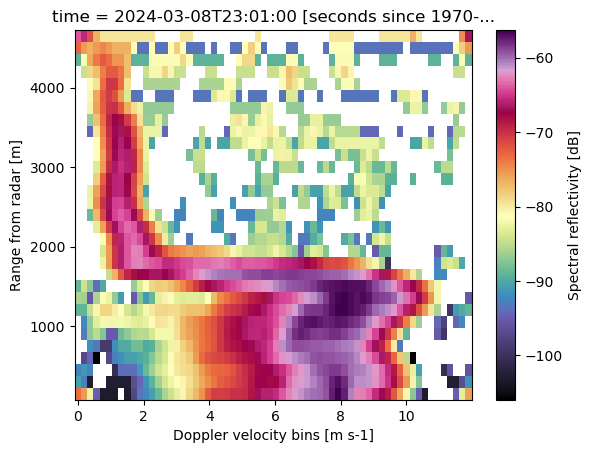

In [8]:
indicies = ds["sweep_0"]["spectrum_index"].sel(
    time="2024-03-08T23:01:00", method="nearest"
)
indicies
ds["sweep_0"]["spectral_reflectivity"].isel(index=indicies).T.plot(
    cmap="ChaseSpectral", x="velocity_bins"
)

## Calculate rainfall accumulation estimated from Doppler velocity spectra

Text(0, 0.5, 'Cumulative rainfall [mm]')

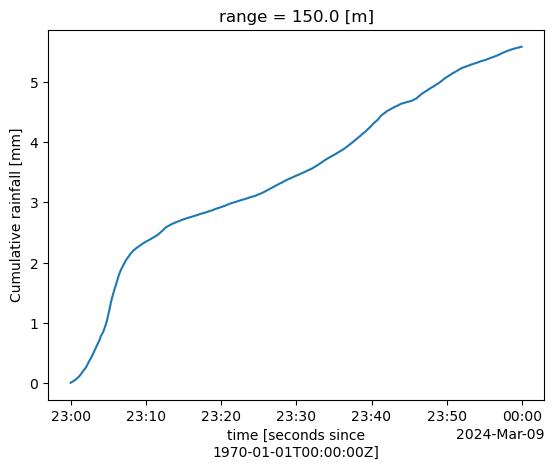

In [11]:
rainfall = ds["sweep_0"]["rainfall_rate"].isel(range=0).cumsum() / 60.0
rainfall.plot()
plt.ylabel("Cumulative rainfall [mm]")